In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/london_merged.csv')

In [ ]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
data.shape

(17414, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [ ]:
data.season.nunique()

4

In [ ]:
data.season.unique()

array([3., 0., 1., 2.])

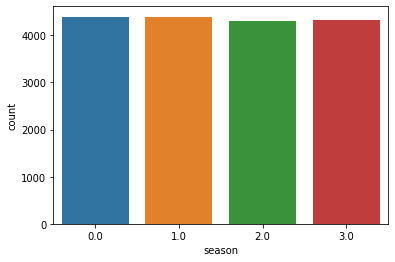

In [ ]:
#create a countplot
sns.countplot(x=data.season)
#show the plot
plt.show()

In [ ]:
data.groupby('season').size()

season
0.0    4394
1.0    4387
2.0    4303
3.0    4330
dtype: int64

In [ ]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
data.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


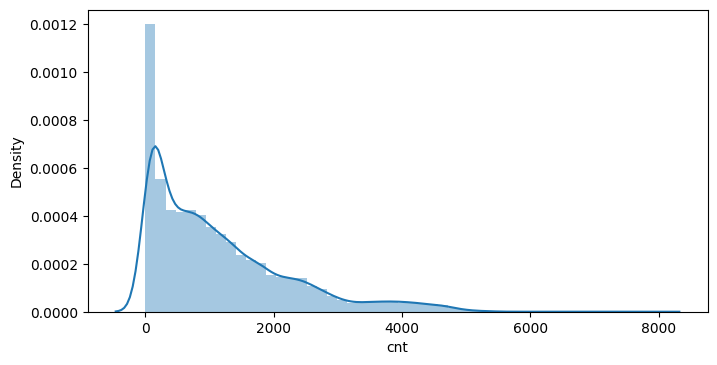

In [ ]:
#target variable is 'cnt'
#how to interpret this?
plt.figure(figsize=(8,4), dpi=100)
sns.distplot(data['cnt'])
plt.show()

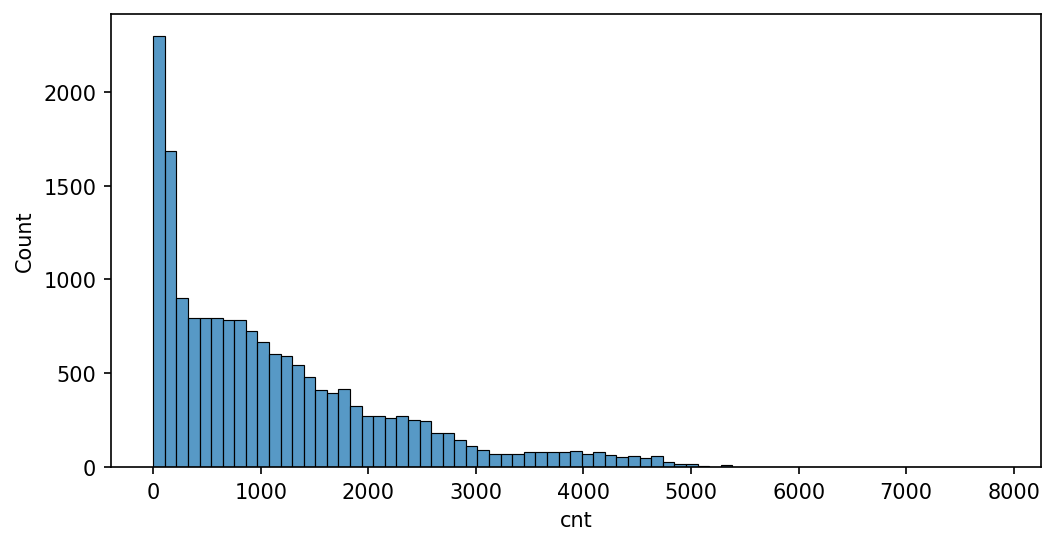

In [ ]:
#target variable is 'cnt'
# I interpret this plot as in the range of 0-100 maximum number of bikes of about 2500 are rented out
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data['cnt'])
plt.show() 

In [ ]:
data.weather_code.unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [ ]:
data.weather_code.nunique()

7

In [ ]:
data.groupby('weather_code').size()

weather_code
1.0     6150
2.0     4034
3.0     3551
4.0     1464
7.0     2141
10.0      14
26.0      60
dtype: int64

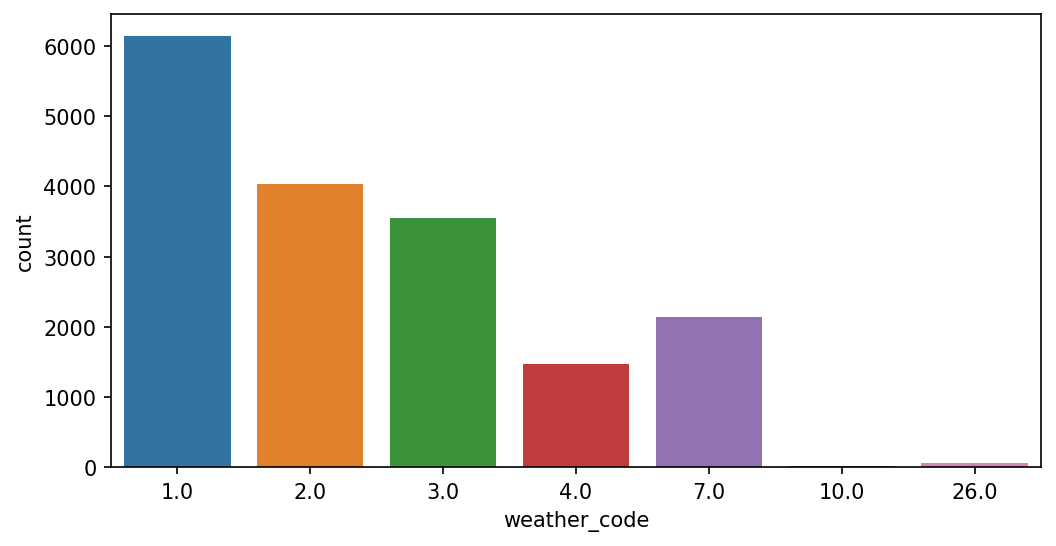

In [ ]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(x=data.weather_code)
plt.show()

In [ ]:
#I want to see count of bikes when it is weekend

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x = data.drop('cnt',axis=1)
y = data.cnt

In [ ]:
x.shape, y.shape

((17414, 9), (17414,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape
#20% of 17414 gives 3483 records which is the test size

((13931, 9), (3483, 9), (13931,), (3483,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train, y_train)
#Models cannot work with 'String data'. Hence we got the error.

ValueError: ignored

In [ ]:
#Need to change timestamp variable 
# changning time to datatime object

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')

type(data['timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  hour          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  year          17414 non-null  int64         
 13  day_of_week   17414 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usage: 1.9 MB


**Learn apply and lambda functions**

In [ ]:
# getting hour, month, year and days of week from timestamp column
#learn apply and lambda functions

data['hour'] = data['timestamp'].apply(lambda time : time.hour)

data['month'] = data['timestamp'].apply(lambda time : time.month)

data['year'] = data['timestamp'].apply(lambda time : time.year)

data['day_of_week'] = data['timestamp'].apply(lambda time : time.dayofweek)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  hour          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  year          17414 non-null  int64         
 13  day_of_week   17414 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usage: 1.9 MB


In [ ]:
data.columns#is there any other way to count?

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'hour', 'month', 'year',
       'day_of_week'],
      dtype='object')

In [ ]:
data.columns.size

14

In [ ]:
data['day_of_week'].value_counts()#how is the day of week calculated?

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: day_of_week, dtype: int64

In [ ]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,2015,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,2015,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,2015,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,2015,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,2015,6


In [ ]:
x = data.drop(['cnt','timestamp'],axis=1)
y = data.cnt

**Drop timestamp**

In [ ]:
x.shape, y.shape

((17414, 8), (17414,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape
#20% of 17414 gives 3483 records which is the test size

((13931, 8), (3483, 8), (13931,), (3483,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print('R2 Score for training set is:', r2)

# We can conclude that data is not present in linear format as R2 Score is 0.28 

mse = (mean_squared_error(y_test, y_pred))
print('Mse is:',mse) 
#Since our mean is 1134 so the squared error is expected to be high

R2 Score for training set is: 0.2809554934439731
Mse is: 866143.9384202563


In [ ]:
x.drop('timestamp',axis=1)

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,2015,6
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,2015,6
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,2015,6
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,2015,6
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,1,2017,1
17410,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,1,2017,1
17411,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,1,2017,1
17412,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,1,2017,1


In [ ]:
x.shape

(17414, 12)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape
#20% of 17414 gives 3483 records which is the test size

((13931, 13), (3483, 13), (13931,), (3483,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train, y_train)

TypeError: ignored

In [ ]:
# convert float variables to int
data.weather_code = data.weather_code.astype(int)
data.is_holiday = data.is_holiday.astype(int)
data.is_weekend = data.is_weekend.astype(int)
data.season = data.season.astype(int)

In [ ]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,0,1,2015,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,1,1,2015,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2,1,2015,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,3,1,2015,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,4,1,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3,0,0,3,19,1,2017,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4,0,0,3,20,1,2017,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4,0,0,3,21,1,2017,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4,0,0,3,22,1,2017,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
 10  hour          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  year          17414 non-null  int64         
 13  day_of_week   17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB


In [ ]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
data = pd.get_dummies(data, columns = ['weather_code', 'season','hour','month'],drop_first = True)

#get_dummies --> one hot encoding --> implements categpries in the binary format

# drop timestamp
data.drop('timestamp', axis=1, inplace=True)

# inspect bike_data df with added dummy variables
data.head(5)

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,year,day_of_week,weather_code_2,weather_code_3,weather_code_4,weather_code_7,weather_code_10,weather_code_26,season_1,season_2,season_3,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,182,3.0,2.0,93.0,6.0,0,1,2015,6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,138,3.0,2.5,93.0,5.0,0,1,2015,6,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,2.5,2.5,96.5,0.0,0,1,2015,6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,72,2.0,2.0,100.0,0.0,0,1,2015,6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,2.0,0.0,93.0,6.5,0,1,2015,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(17414, 52)

In [ ]:
data.info()#where has season 0 gone? 
#Year and dAy of week has been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cnt              17414 non-null  int64  
 1   t1               17414 non-null  float64
 2   t2               17414 non-null  float64
 3   hum              17414 non-null  float64
 4   wind_speed       17414 non-null  float64
 5   is_holiday       17414 non-null  int64  
 6   is_weekend       17414 non-null  int64  
 7   year             17414 non-null  int64  
 8   day_of_week      17414 non-null  int64  
 9   weather_code_2   17414 non-null  uint8  
 10  weather_code_3   17414 non-null  uint8  
 11  weather_code_4   17414 non-null  uint8  
 12  weather_code_7   17414 non-null  uint8  
 13  weather_code_10  17414 non-null  uint8  
 14  weather_code_26  17414 non-null  uint8  
 15  season_1         17414 non-null  uint8  
 16  season_2         17414 non-null  uint8  
 17  season_3    

In [ ]:
# create correlation matrix displaying pearson correlation coefficients for all variables
corr_matrix = data.corr()
corr_matrix

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,year,day_of_week,weather_code_2,weather_code_3,weather_code_4,weather_code_7,weather_code_10,weather_code_26,season_1,season_2,season_3,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.051698,-0.096499,0.010046,-0.068688,0.178668,0.024265,-0.141802,-0.148419,-0.014631,-0.048351,0.171869,0.018929,-0.170381,-0.180904,-0.192833,-0.200889,-0.204898,-0.197736,-0.130034,0.062596,0.333934,0.098088,-0.015067,0.001561,0.055983,0.069807,0.063313,0.081200,1.400896e-01,0.324647,0.286043,0.097798,-0.016028,-0.077245,-0.105780,-0.134830,-0.082268,-0.062023,-0.008336,0.037184,0.066025,0.112557,0.090016,0.058040,2.090187e-02,-0.048855,-0.083707
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.042233,-0.005342,-0.037959,-0.002317,0.083624,0.002412,-0.100665,-0.035551,0.004890,-0.076439,0.621079,0.058726,-0.493652,-0.055766,-0.064409,-0.072221,-0.078740,-0.082620,-0.079658,-0.064885,-0.041533,-0.010090,0.021162,0.047778,0.068021,0.081195,0.089151,0.089635,8.335503e-02,0.069609,0.054083,0.035154,0.014078,-0.004813,-0.020761,-0.034043,-0.327645,-0.254688,-0.121759,0.081185,0.226739,0.373497,0.370131,0.220415,1.467829e-02,-0.140511,-0.130478
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.040051,-0.008510,-0.044972,-0.006824,0.072940,0.008177,-0.089269,-0.037516,0.002820,-0.082037,0.602435,0.085521,-0.505278,-0.049718,-0.058370,-0.065276,-0.071769,-0.074602,-0.072927,-0.060397,-0.039339,-0.010835,0.018335,0.043440,0.062236,0.074184,0.080604,0.080832,7.449669e-02,0.063189,0.049765,0.032264,0.013904,-0.003675,-0.017715,-0.030288,-0.348098,-0.270884,-0.118147,0.099311,0.230430,0.356365,0.354638,0.227046,4.739501e-02,-0.138189,-0.109193
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.032068,0.028098,0.072443,0.011556,-0.204839,0.138482,0.169534,0.262400,0.005018,0.067649,-0.222180,0.150935,0.224532,0.101526,0.115855,0.127092,0.135702,0.142026,0.135121,0.111977,0.074161,0.022361,-0.033937,-0.081777,-0.120277,-0.145237,-0.159931,-0.164200,-1.515860e-01,-0.127536,-0.098419,-0.062490,-0.023495,0.013942,0.042299,0.066222,0.052462,-0.008928,-0.100460,-0.127234,-0.070415,-0.169162,-0.107382,-0.011783,1.131254e-01,0.133904,0.185683
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,-0.002606,0.011479,-0.094739,0.001708,0.128399,0.092243,-0.072324,0.102024,0.006087,0.014551,-0.009503,-0.114850,0.088480,-0.058969,-0.066539,-0.073987,-0.077748,-0.078770,-0.066649,-0.051200,-0.029792,0.007845,0.036290,0.064053,0.078394,0.085603,0.092435,0.086367,7.705752e-02,0.060107,0.041007,0.024047,0.000953,-0.019666,-0.035505,-0.045893,0.035421,0.035499,-0.021869,0.041409,-0.012893,0.035119,-0.037216,-0.086013,-1.444400e-01,0.051251,0.027460
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,1.000000,-0.094898,0.034631,-0.144628,-0.013861,-0.007089,-0.011672,0.028328,-0.004259,-0.002156,-0.043903,-0.086025,0.043895,0.000068,0.000198,0.000198,0.000198,0.000198,-0.000018,-0.000018,0.000068,-0.000061,0.000025,-0.000061,-0.000147,-0.000104,-0.000104,-0.000147,-1.900384e-04,-0.000104,-0.000104,-0.000061,-0.000061,-0.000018,0.000025,0.000155,-0.043688,0.021997,0.023144,0.088390,-0.044777,-0.045781,0.021395,-0.044295,-4.574739e-02,-0.044914,0.088622
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,-0.094898,1.000000,0.003049,0.791975,-0.055854,0.027626,0.066522,0.008114,-0.008953,0.021431,-0.001482,-0.000615,0.001826,-0.000402,-0.001133,-0.000495,-0.000495,-0.000495,-0.000129,-0.000129,-0.000402,-0.000310,-0.001220,-0.000310,0.000598,0.000780,0.000780,0.000598,4.163173e-04,0.000780,0.000780,0.000326,0.000326,0.000508,0.000690,-0.000677,-0.002779,-0.012344,-0.001575,0.014247,-0.010142,0.003792,0.003854,-0.015393,1.454553e-02,-0.00052

In [ ]:
# set limit for correlation coefficient
drop_corr = .95

# select only upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# drop any variables with correlation coefficient greater than drop_corr value
to_drop = [column for column in upper.columns if any(upper[column] > drop_corr)]
data = data.drop(to_drop,axis=1)
print("Dropping: " + str(to_drop) + " variable(s) for exceeding correlation of " + str(drop_corr))
      
# display remaining variables represented as dataframe columns
data.columns

Dropping: ['t2'] variable(s) for exceeding correlation of 0.95


Index(['cnt', 't1', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'year',
       'day_of_week', 'weather_code_2', 'weather_code_3', 'weather_code_4',
       'weather_code_7', 'weather_code_10', 'weather_code_26', 'season_1',
       'season_2', 'season_3', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
data.shape

(17414, 51)

In [ ]:
x = data.drop('cnt', axis=1)
y = data.cnt

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model = model.fit(x_train, y_train)

In [ ]:
# model evaluation for training set
y_train_predict = model.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

In [ ]:
print('RMSE for training set is:',rmse)
print('R2 Score for training set is:', r2)

RMSE for training set is: 575.5916343556164
R2 Score for training set is: 0.7146284051550591


In [ ]:
# model evaluation for Test set
y_test_predict = model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse_t = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_t = r2_score(y_test, y_test_predict)

In [ ]:
print('RMSE for training set is:',rmse_t)
print('R2 Score for training set is:', r2_t)

RMSE for training set is: 580.6364474583019
R2 Score for training set is: 0.7194970826367055


In [ ]:
# This link uses OLS
#https://www.kaggle.com/patriciopace/london-bike-sharing-eda-multiple-regression

**Decision Tree Regression**

In [ ]:
# create an instance of decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

model1 = DecisionTreeRegressor()
model1 = model1.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_train, y_train_predict)
print('R2 Score for training set is:', r2)

In [ ]:
# model evaluation for training set
y_train_predict = model1.predict(x_train)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE for training set is:',rmse)
print('R2 Score for training set is:', r2)

RMSE for training set is: 2.7505568140171714
R2 Score for training set is: 0.999993483370416


In [ ]:
# model evaluation for Test set

y_test_predict = model1.predict(x_test)

rmse_t = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_t = r2_score(y_test, y_test_predict)

print('RMSE for training set is:',rmse_t)
print('R2 Score for training set is:', r2_t)

RMSE for training set is: 378.9333223924871
R2 Score for training set is: 0.8805312305472124


**Support Vector Regression**

In [ ]:
# create an instance of decision tree regressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

model2 = SVR()
model2 = model2.fit(x_train, y_train)

In [ ]:
# model evaluation for training set
y_train_predict = model2.predict(x_train)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE for training set is:',rmse)
print('R2 Score for training set is:', r2)



RMSE for training set is: 1117.485366990828
R2 Score for training set is: -0.07563638804738515


In [ ]:
# model evaluation for Test set

y_test_predict = model2.predict(x_test)

rmse_t = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_t = r2_score(y_test, y_test_predict)

print('RMSE for training set is:',rmse_t)
print('R2 Score for training set is:', r2_t)

RMSE for training set is: 1139.5439329982805
R2 Score for training set is: -0.08041583711846667


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

model3 = RandomForestRegressor()
model3 = model3.fit(x_train, y_train)

# model evaluation for training set
y_train_predict = model3.predict(x_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE for training set is:',rmse)
print('R2 Score for training set is:', r2)

RMSE for training set is: 105.31962338587672
R2 Score for training set is: 0.9904456666285371


In [ ]:
# model evaluation for Test set

y_test_predict = model3.predict(x_test)

rmse_t = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_t = r2_score(y_test, y_test_predict)

print('RMSE for training set is:',rmse_t)
print('R2 Score for training set is:', r2_t)

RMSE for training set is: 273.956520080786
R2 Score for training set is: 0.9375558041712635


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Fit the training data into polynomial model of degree 4 (appropriate value as per the data-set).
model = PolynomialFeatures(degree= 2)
x_ = model.fit_transform(x)
x_test_ = model.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_,y)
predicted_data = lg.predict(x_test_)
predicted_data = np.round_(predicted_data)

In [ ]:
from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test,predicted_data))

58030.86764283664


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Fit the training data into polynomial model of degree 3 (appropriate value as per the data-set).
model = PolynomialFeatures(degree= 3)
x_ = model.fit_transform(x)
x_test_ = model.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_,y)
predicted_data = lg.predict(x_test_)
predicted_data = np.round_(predicted_data)

from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test,predicted_data))

28088.014642549526


In [ ]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,2015,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,2015,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,2015,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,2015,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,1,2017,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,1,2017,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,1,2017,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,1,2017,1


In [ ]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,11.513265,6.514643,2015.507810,2.99265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,6.915893,3.452509,0.508157,2.00406
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,0.00000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,6.000000,4.000000,2015.000000,1.00000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,12.000000,7.000000,2016.000000,3.00000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,18.000000,10.000000,2016.000000,5.00000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,23.000000,12.000000,2017.000000,6.00000
